In [1]:
!pip install thinknum
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from thinknum import Query
q = Query(
    client_id='abc',
    client_secret='xyz'
)

q.add_ticker('nasdaq:nflx')
nflx=q.get_data(dataset_id='job_listings') 
col= [i['display_name'] for i in nflx['group_fields']]
df=pd.DataFrame(nflx['rows'], columns = col)

In [2]:
df.columns

Index(['Ticker Symbol', 'Entity Name', 'CUSIP', 'ISIN', 'Unique ID',
       'Listing ID', 'Domain', 'As Of Date', 'Title', 'URL', 'Brand',
       'Category', 'Location Text', 'City', 'State', 'Country', 'Posted Date',
       'Number of Openings', 'Description', 'Salary', 'Salary Currency',
       'Salary Description', 'Coordinates', 'Date Added', 'Date Updated',
       'Sector', 'Industry', 'GICS Sector', 'GICS Industry', 'ICB Industry',
       'ICB Sector'],
      dtype='object')

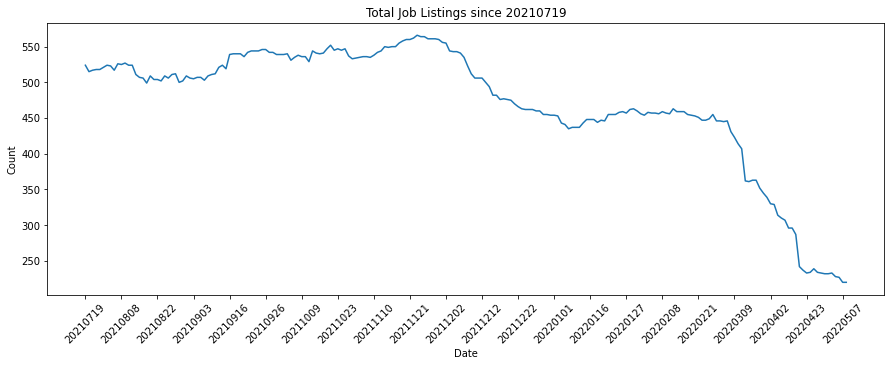

In [23]:
total_jobs=df.groupby('As Of Date')['URL'].count()
total_jobs=total_jobs[1:]
l=len(total_jobs)
lst=list(range(0,l,10))
plt.figure(figsize=(15,5))
plt.title('Total Job Listings since ' + total_jobs.index.min())
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(lst,rotation=45)
plt.plot(total_jobs.index,total_jobs)

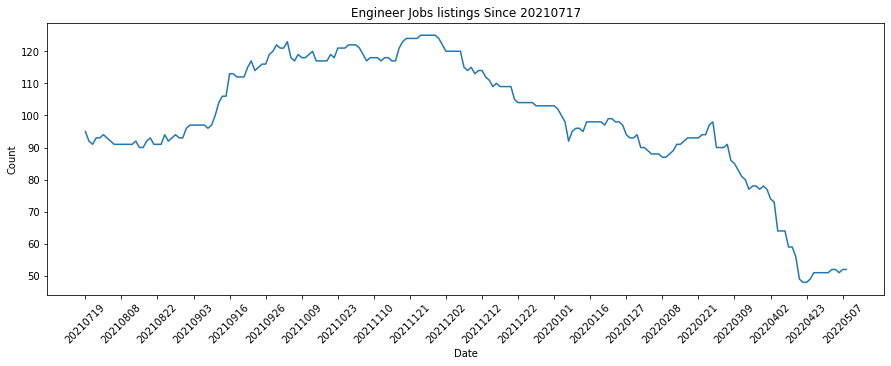

In [76]:
#engineering jobs
def jobs(b):
    jobs=df[df['Title'].str.contains(b)]
    engineer=jobs.groupby('As Of Date')['URL'].count()
    engineer=engineer[1:]
    engineer_dates=engineer.index
    plt.figure(figsize=(15,5))
    plt.title(b + ' Jobs listings Since ' + df['As Of Date'].min())
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.xticks(lst,rotation=45)
    return plt.plot(engineer_dates,engineer)
jobs('Engineer')

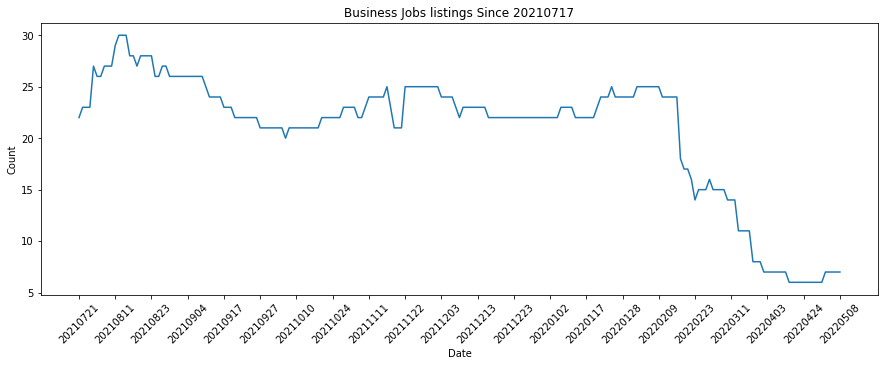

In [77]:
#sales jobs
jobs('Business')

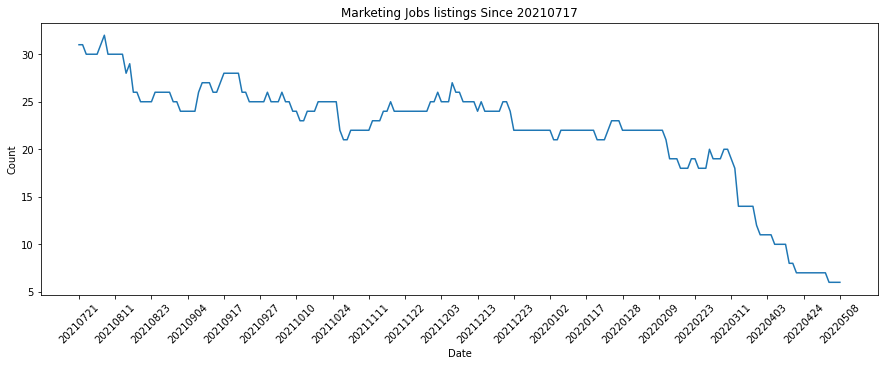

In [78]:
#marketing jobs
jobs('Marketing')

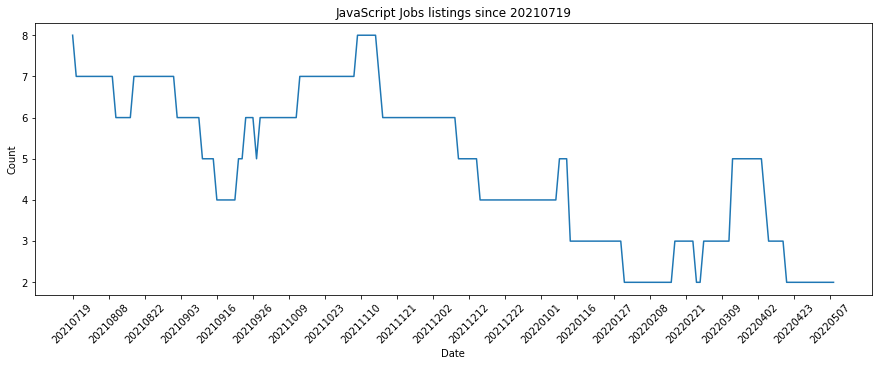

In [80]:
#Javascript jobs
def coding(a):
    coding_jobs=df[df['Description'].str.contains(a)]
    coding=coding_jobs.groupby("As Of Date")['URL'].count()
    coding_dates=coding.index
    plt.figure(figsize=(15,5))
    plt.title(a + ' Jobs listings since ' +coding.index.min())
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.xticks(lst,rotation=45)
    return plt.plot(coding_dates, coding)
    
coding('JavaScript')

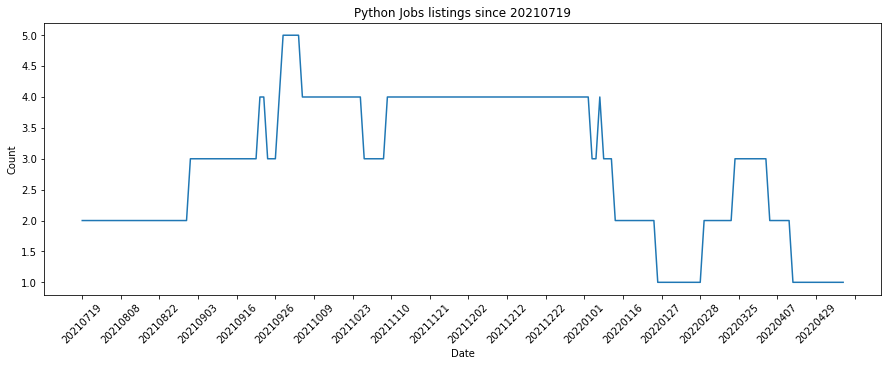

In [81]:
#Python jobs
coding('Python')

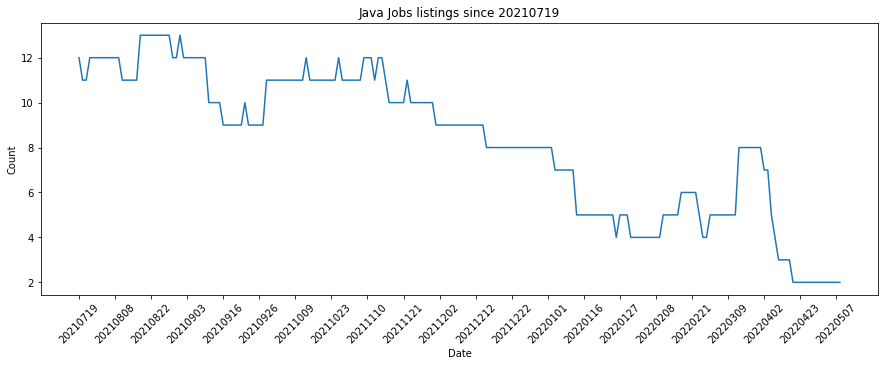

In [82]:
#Java jobs
coding('Java')

In [83]:
pd.DataFrame(df.groupby('Title')['URL'].count())

,URL
Title,
(Contract) Anime Production Finance Coordinator (JET Program) - Japan,45
(Contract) Consumer Products APAC Marketing Manager,28
"(Contract) Coordinator, Production Finance (JET Program)",14
"(Contract) Coordinator, Production Finance (JET Program) - Japan",14
"(Contract) Coordinator, Production Finance (JET Program) - Korea",33
...,...
Writer - Games,3
Writer - Games Studio,1
Writer - Night School Studio,2


In [84]:
#create yyyymmdd format for dates
date=df['As Of Date']
i=0
date_n=[]

for x in date:
    date_n.append(date[i][0:8])
    i=i+1
df['Date']=date_n

In [29]:
#job count by countries for today
todays_jobs=df[df['Date']==df['Date'][0]]

countries=todays_jobs.groupby('Country')['URL'].count()
countries

Country
COL      1
DEU      1
FRA      1
GBR      4
IND      4
JPN      6
KOR     14
MEX     10
NLD     13
PHL      8
SWE      1
THA      4
TUR      1
TWN      1
USA    137
Name: URL, dtype: int64

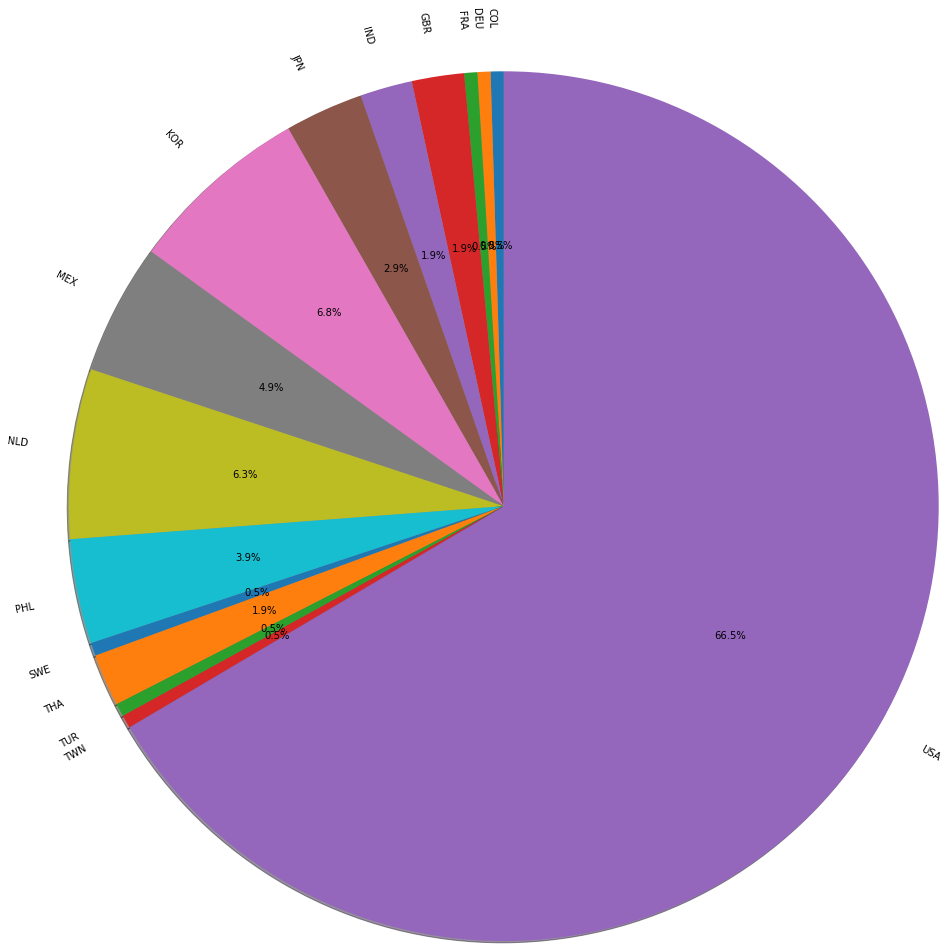

In [28]:
#job count by countries for today

labels=countries.index

fig1, ax1 = plt.subplots()
ax1.pie(countries, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, radius=5, labeldistance=1.1, rotatelabels=True)
plt.show()


<AxesSubplot:xlabel='Country'>

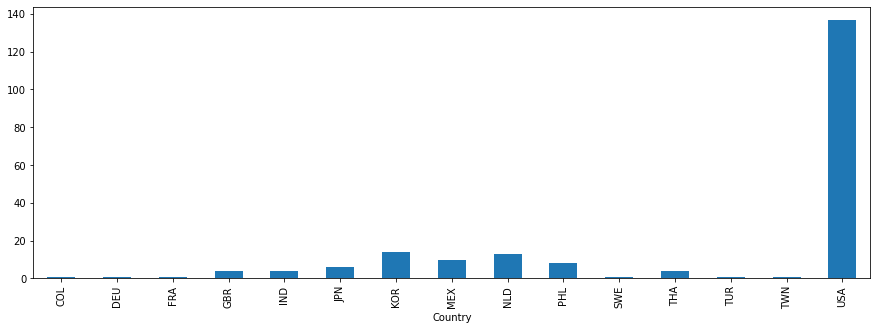

In [25]:
#job count by countries for today
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
countries.plot.bar(x=labels, y=countries)

In [14]:
df[['Country','URL','As Of Date']]

,Country,URL,As Of Date
0,None,https://jobs.lever.co/netflix/61c9840f-e2b5-42...,20220508
1,None,https://jobs.lever.co/netflix/097e6d70-e9f4-47...,20220508
2,None,https://jobs.lever.co/netflix/8ba770fe-ce96-47...,20220508
3,None,https://jobs.lever.co/netflix/c03b0df2-bde7-49...,20220508
4,None,https://jobs.lever.co/netflix/aeccf186-bc27-4c...,20220508
...,...,...,...
99995,USA,https://jobs.lever.co/netflix/f3e94c70-322e-49...,20210717
99996,USA,https://jobs.lever.co/netflix/85aaa802-5c4b-44...,20210717
99997,USA,https://jobs.lever.co/netflix/f93dff8a-27ee-46...,20210717
99998,USA,https://jobs.lever.co/netflix/54e45ce8-8714-43...,20210717


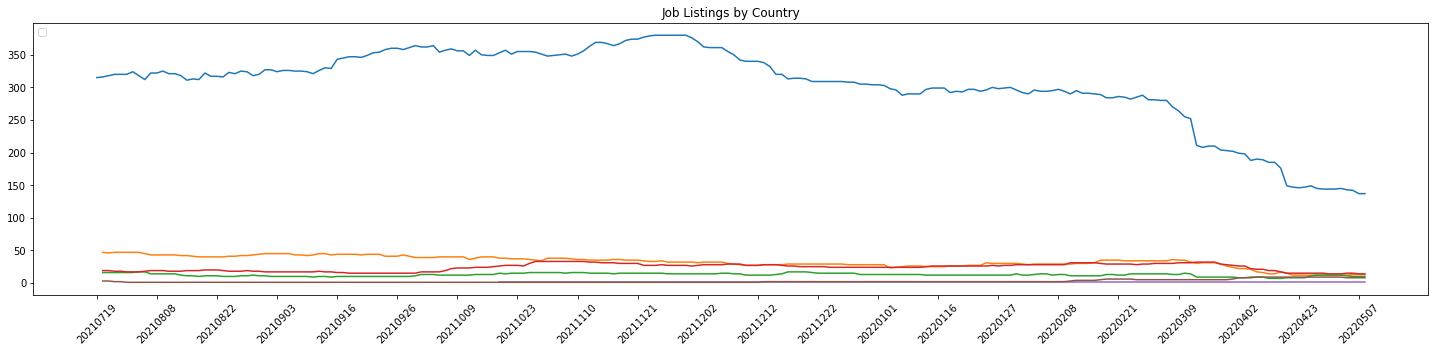

In [97]:
#jobs in the USA over time

usa_jobs=df[df['Country']=='USA']
usa=usa_jobs.groupby('As Of Date')['URL'].count()
usa=usa[1:]

nld_jobs=df[df['Country']=='NLD']
nld=nld_jobs.groupby('As Of Date')['URL'].count()
nld=nld[1:]

mex_jobs=df[df['Country']=='MEX']
mex=mex_jobs.groupby('As Of Date')['URL'].count()
mex=mex[1:]

kor_jobs=df[df['Country']=='KOR']
kor=kor_jobs.groupby('As Of Date')['URL'].count()
kor=kor[1:]

twn_jobs=df[df['Country']=='TWN']
twn=twn_jobs.groupby('As Of Date')['URL'].count()

phl_jobs=df[df['Country']=='PHL']
phl=phl_jobs.groupby('As Of Date')['URL'].count()

phl=phl[1:]
plt.figure(figsize=(25,5))
plt.xticks(lst,rotation=45)
plt.title('Job Listings by Country')
plt.legend(['USA','NLD','MEX','KOR','TWN','PHL'], loc='upper left')
plt.plot(usa.index,usa, label='USA')
plt.plot(nld.index,nld, label='NLD')
plt.plot(mex.index,mex, label='MEX')
plt.plot(kor.index,kor, label='KOR')
plt.plot(twn.index,twn, label='TWN')
plt.plot(phl.index,phl, label='PHL')

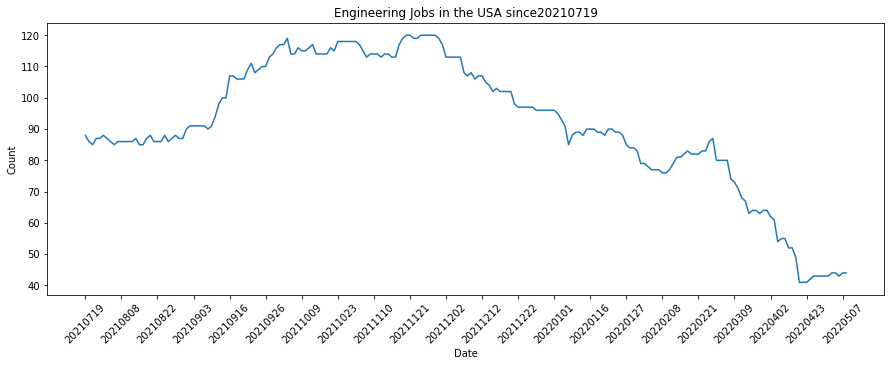

In [85]:
#uusa Engineering jobs
usa_engineers=df[df['Country']=='USA']
usa_e=usa_engineers[usa_engineers['Title'].str.contains("Engineer", "Engineering")].groupby('As Of Date')['URL'].count()
usa_e=usa_e[1:]
plt.figure(figsize=(15,5))
plt.title('Engineering Jobs in the USA since' + total_jobs.index.min())
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(lst, rotation=45)
plt.plot(usa_e.index, usa_e)

Findings

-After NFLX earnings call, management noted that they would be decreasing hiring as they forecasted slower growth in quarter to come. Mainly due to interest rate hikes, NFLX hiring has slowed tremendously from its pandemic highs of 550 listings down to just over 45 listings. This would have been a signal to bet against NFLX as their stock plummeted 25%+ after their most recent earnings call where it was noted by management that hiring will slow in the next few quarters.

-we can also see that among the coding languages, NFLX is hiring more Java developers than Python developers. Additionally, we can see that NFLX has decreased their hiring in sales, engineering and marketing severely. For a tech company this is significant because the decrease in engineering hiring can suggest they are focusing less on building new technologies and improving their current technologies.

-NFLX has also decreased their hiring by geopgraphy as it shows the USA hiring has slowed the most. This can show that NFLX could be thinking about hiring more outside the USA as it may be cheaper to outsource jobs to a lesser developed country where labor is cheaper.

Conclusion

Job listings data not only shows how much a company is looking to grow but it can also shed light on the current focus of the company as well